In [1]:
import networkx as nx
dg = nx.DiGraph()
dg.add_nodes_from([1, 2, 3])
dg.add_edges_from([(1, 2), (2, 1), (3, 1)])
print(dg.nodes(data=True))
print(dg.edges(data=True))
print(dg[1])

[(1, {}), (2, {}), (3, {})]
[(1, 2, {}), (2, 1, {}), (3, 1, {})]
{2: {}}


In [2]:
import networkx as nx

In [3]:
def loadCT(filename):
    content = open(filename).read().splitlines()
    G = nx.Graph(name=str(content[0]))
    tmp = content[1].split(" ")
    if tmp[0] == '':
        nb_nodes = int(tmp[1])
        nb_edges = int(tmp[2])
    else:
        nb_nodes = int(tmp[0])
        nb_edges = int(tmp[1])

    for i in range(0, nb_nodes):
        tmp = content[i + 2].split(" ")
        tmp = [x for x in tmp if x != '']
        G.add_node(i, label=tmp[3])

    for i in range(0, nb_edges):
        tmp = content[i+G.number_of_nodes()+2].split(" ")
        tmp = [x for x in tmp if x != '']
        G.add_edge(int(tmp[0]) - 1, int(tmp[1]) - 1, label=int(tmp[3]))
    return G


In [4]:
def loadDataset(filename):
    from os.path import dirname, splitext

    dirname_dataset = dirname(filename)
    extension = splitext(filename)[1][1:]
    data = []
    y = []
    if(extension == "ds"):
        content = open(filename).read().splitlines()
        for i in range(0, len(content)):
            tmp = content[i].split(' ')
            data.append(loadCT(dirname_dataset + '/' + tmp[0].replace('#', '', 1)))
            y.append(float(tmp[1]))
    elif(extension == "cxl"):
        import xml.etree.ElementTree as ET

        tree = ET.parse(filename)
        root = tree.getroot()
        data = []
        y = []
        for graph in root.iter('print'):
            mol_filename = graph.attrib['file']
            mol_class = graph.attrib['class']
            data.append(loadGXL(dirname_dataset + '/' + mol_filename))
            y.append(mol_class)

    return data, y

In [5]:
dataset, y = loadDataset("../../datasets/acyclic/dataset_bps.ds")

In [6]:
import networkx as nx
import numpy as np


def getSPLengths(G1):
    sp = nx.shortest_path(G1)
    distances = np.zeros((G1.number_of_nodes(), G1.number_of_nodes()))
    for i in np.keys():
        for j in np[i].keys():
            distances[i, j] = len(sp[i][j])-1

def getSPGraph(G):
    """Transform graph G to its corresponding shortest-paths graph.
    
    Parameters
    ----------
    G : NetworkX graph
        The graph to be tramsformed.
        
    Return
    ------
    S : NetworkX graph
        The shortest-paths graph corresponding to G.
        
    Notes
    ------
    For an input graph G, its corresponding shortest-paths graph S contains the same set of nodes as G, while there exists an edge between all nodes in S which are connected by a walk in G. Every edge in S between two nodes is labeled by the shortest distance between these two nodes.
    
    References
    ----------
    [1] Borgwardt KM, Kriegel HP. Shortest-path kernels on graphs. InData Mining, Fifth IEEE International Conference on 2005 Nov 27 (pp. 8-pp). IEEE.
    """
    return floydTransformation(G)
            
def floydTransformation(G):
    """Transform graph G to its corresponding shortest-paths graph using Floyd-transformation.
    
    Parameters
    ----------
    G : NetworkX graph
        The graph to be tramsformed.
        
    Return
    ------
    S : NetworkX graph
        The shortest-paths graph corresponding to G.
        
    References
    ----------
    [1] Borgwardt KM, Kriegel HP. Shortest-path kernels on graphs. InData Mining, Fifth IEEE International Conference on 2005 Nov 27 (pp. 8-pp). IEEE.
    """
    spMatrix = nx.floyd_warshall_numpy(G) # @todo weigth label not considered
    S = nx.Graph()
    S.add_nodes_from(G)
    for i in range(0, G.number_of_nodes()):
        for j in range(0, G.number_of_nodes()):
            print(spMatrix[i, j])
            S.add_edge(i, j, cost = spMatrix[i, j])
    return S

[[0. 2. 3. 1. 2.]]
{0: {0: [0], 3: [0, 3], 1: [0, 3, 1], 4: [0, 3, 4], 2: [0, 3, 4, 2]}, 1: {1: [1], 3: [1, 3], 0: [1, 3, 0], 4: [1, 3, 4], 2: [1, 3, 4, 2]}, 2: {2: [2], 4: [2, 4], 3: [2, 4, 3], 0: [2, 4, 3, 0], 1: [2, 4, 3, 1]}, 3: {3: [3], 0: [3, 0], 1: [3, 1], 4: [3, 4], 2: [3, 4, 2]}, 4: {4: [4], 2: [4, 2], 3: [4, 3], 0: [4, 3, 0], 1: [4, 3, 1]}}
[[0. 2. 3. 1. 2.]
 [2. 0. 3. 1. 2.]
 [3. 3. 0. 2. 1.]
 [1. 1. 2. 0. 1.]
 [2. 2. 1. 1. 0.]]


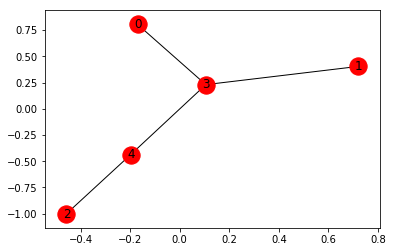

0.0
2.0
3.0
1.0
2.0
2.0
0.0
3.0
1.0
2.0
3.0
3.0
0.0
2.0
1.0
1.0
1.0
2.0
0.0
1.0
2.0
2.0
1.0
1.0
0.0
{(0, 0): 0.0, (0, 1): 2.0, (0, 2): 3.0, (0, 3): 1.0, (0, 4): 2.0, (1, 1): 0.0, (1, 2): 3.0, (1, 3): 1.0, (1, 4): 2.0, (2, 2): 0.0, (2, 3): 2.0, (2, 4): 1.0, (3, 3): 0.0, (3, 4): 1.0, (4, 4): 0.0}


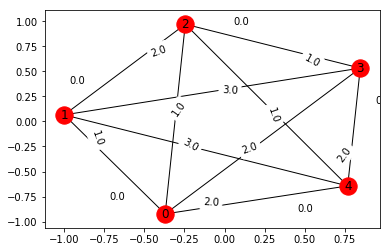

In [12]:
dataset, y = loadDataset("../../datasets/acyclic/dataset_bps.ds")
G1 = dataset[12]

nx.draw_networkx(G1)
# print(list(dataset[12][4]))

l = nx.shortest_path(G1)

l2 = nx.floyd_warshall_numpy(G1)
print(np.array(l2[0]))
print(l)
print(l2)
from matplotlib import pyplot as plt
plt.show()

S = getSPGraph(G1)
nx.draw_networkx(S)
pos = nx.spring_layout(S)
edge_labels = nx.get_edge_attributes(S,'cost')
print(edge_labels)
nx.draw_networkx_edge_labels(S, pos, edge_labels = edge_labels)
plt.show()

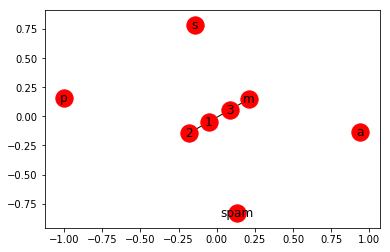

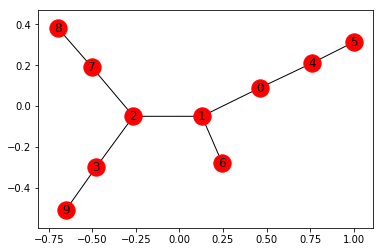

3

In [18]:
import matplotlib.pyplot as plt
G = dataset[155]
G.clear()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
nx.draw_networkx(G)
plt.show()

K_5 = nx.random_lobster(30, 0.9, 0.9)
nx.draw_networkx(K_5)
plt.show()
G.number_of_nodes()
G.number_of_edges()